In [1]:
import torch
from sklearn.datasets import load_wine

# Load the Wine dataset
wine = load_wine()

# Explore dataset features and target classes
print("Features:", wine.feature_names)
print("Target classes:", wine.target_names)

Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target classes: ['class_0' 'class_1' 'class_2']


In [2]:
import torch
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# TODO: Split the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y)
# Display the shapes of the resulting splits
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (124, 13)
Shape of X_test: (54, 13)
Shape of y_train: (124,)
Shape of y_test: (54,)


In [3]:
import torch
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Scale the features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# TODO: Convert scaled data to PyTorch tensors
# Convert the scaled training and testing data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Display example tensors
print("Sample of X_train_tensor:", X_train_tensor[0])
print("Sample of y_train_tensor:", y_train_tensor[0])

Sample of X_train_tensor: tensor([ 1.1106, -0.6648,  0.8724, -0.7386, -0.4595,  0.2207,  1.0223, -1.0826,
         1.1635,  0.2843,  1.2907,  1.0697,  1.7044])
Sample of y_train_tensor: tensor(0)


In [7]:


import torch
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define a function load_preprocessed_data that performs the following steps:
def load_preprocessed_data():
    # 1. Load the Wine dataset
    wine = load_wine()
    # 2. Split the dataset into training and testing sets
    X, y = wine.data, wine.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
    # 3. Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 4. Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long)
    
    # 5. Return the processed x and y tensors for training and testing 
    return X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor

# Call load_preprocessed_data and print the shapes of the returned tensors
X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor = load_preprocessed_data()
print(X_train_tensor.shape, X_test_tensor.shape, y_train_tensor.shape, y_test_tensor.shape)


torch.Size([124, 13]) torch.Size([54, 13]) torch.Size([124]) torch.Size([54])


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim


def load_preprocessed_data():
    # 1. Load the Wine dataset
    wine = load_wine()
    # 2. Split the dataset into training and testing sets
    X, y = wine.data, wine.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
    # 3. Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 4. Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long)
    
    # 5. Return the processed x and y tensors for training and testing 
    return X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor

X_train, X_test, y_train, y_test = load_preprocessed_data()

# Define the model using nn.Sequential
model = nn.Sequential(
    nn.Linear(13, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 3)
)

# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 150
history = {'loss': [], 'val_loss': []}
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    history['loss'].append(loss.item())
    
    model.eval()
    with torch.no_grad():
        outputs_val = model(X_test)
        val_loss = criterion(outputs_val, y_test)
        history['val_loss'].append(val_loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

Epoch [10/150], Loss: 1.0905, Validation Loss: 1.0957
Epoch [20/150], Loss: 1.0566, Validation Loss: 1.0657
Epoch [30/150], Loss: 1.0179, Validation Loss: 1.0306
Epoch [40/150], Loss: 0.9722, Validation Loss: 0.9892
Epoch [50/150], Loss: 0.9186, Validation Loss: 0.9402
Epoch [60/150], Loss: 0.8578, Validation Loss: 0.8855
Epoch [70/150], Loss: 0.7929, Validation Loss: 0.8268
Epoch [80/150], Loss: 0.7280, Validation Loss: 0.7667
Epoch [90/150], Loss: 0.6656, Validation Loss: 0.7083
Epoch [100/150], Loss: 0.6065, Validation Loss: 0.6535
Epoch [110/150], Loss: 0.5530, Validation Loss: 0.6050
Epoch [120/150], Loss: 0.5066, Validation Loss: 0.5628
Epoch [130/150], Loss: 0.4668, Validation Loss: 0.5252
Epoch [140/150], Loss: 0.4326, Validation Loss: 0.4924
Epoch [150/150], Loss: 0.4023, Validation Loss: 0.4624


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


def load_preprocessed_data():
    # 1. Load the Wine dataset
    wine = load_wine()
    # 2. Split the dataset into training and testing sets
    X, y = wine.data, wine.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
    # 3. Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 4. Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long)
    
    # 5. Return the processed x and y tensors for training and testing 
    return X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor

X_train, X_test, y_train, y_test = load_preprocessed_data()
    
    
simplenet = nn.Sequential(
            nn.Linear(13, 10),
            nn.ReLU(),
            nn.Linear(10,10),
            nn.ReLU(),
            nn.Linear(10,3),
        )

critierion = nn.CrossEntropyLoss()
optimizer = optim.Adam(simplenet.parameters(),lr=0.01)

for epoch in range(100):
    simplenet.train()
    optimizer.zero_grad()
    outputs = simplenet(X_train)
    loss = critierion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch +1)%20 == 0:
        print(f"Epoch : {epoch+1}, loss:{loss.item()}")

    

Epoch : 20, loss:0.6198025941848755
Epoch : 40, loss:0.31639376282691956
Epoch : 60, loss:0.21563369035720825
Epoch : 80, loss:0.1601736694574356
Epoch : 100, loss:0.12346648424863815


In [13]:
import torch
import torch.nn as nn
import torch.optim as optim


X_train, X_test, y_train, y_test = load_preprocessed_data()

# Define the model using nn.Sequential
model = nn.Sequential(
    nn.Linear(13, 5),
    nn.ReLU(),
    nn.Linear(5, 10),
    nn.ReLU(),
    nn.Linear(10, 3)
)

# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
num_epochs = 200
history = {'loss': [], 'val_loss': []}
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)  
    loss.backward()
    optimizer.step()
    history['loss'].append(loss.item())
    
    model.eval()
    with torch.no_grad():
        outputs_val = model(X_test)
        val_loss = criterion(outputs_val, y_test)  
        history['val_loss'].append(val_loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

Epoch [10/200], Loss: 0.7791, Validation Loss: 0.7103
Epoch [20/200], Loss: 0.3135, Validation Loss: 0.2618
Epoch [30/200], Loss: 0.0792, Validation Loss: 0.1112
Epoch [40/200], Loss: 0.0219, Validation Loss: 0.1092
Epoch [50/200], Loss: 0.0081, Validation Loss: 0.1029
Epoch [60/200], Loss: 0.0043, Validation Loss: 0.1215
Epoch [70/200], Loss: 0.0029, Validation Loss: 0.1445
Epoch [80/200], Loss: 0.0022, Validation Loss: 0.1549
Epoch [90/200], Loss: 0.0018, Validation Loss: 0.1584
Epoch [100/200], Loss: 0.0015, Validation Loss: 0.1617
Epoch [110/200], Loss: 0.0013, Validation Loss: 0.1655
Epoch [120/200], Loss: 0.0012, Validation Loss: 0.1686
Epoch [130/200], Loss: 0.0011, Validation Loss: 0.1713
Epoch [140/200], Loss: 0.0009, Validation Loss: 0.1737
Epoch [150/200], Loss: 0.0009, Validation Loss: 0.1760
Epoch [160/200], Loss: 0.0008, Validation Loss: 0.1782
Epoch [170/200], Loss: 0.0007, Validation Loss: 0.1804
Epoch [180/200], Loss: 0.0006, Validation Loss: 0.1824
Epoch [190/200], Lo

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim


X_train, X_test, y_train, y_test = load_preprocessed_data()


model = nn.Sequential(
    nn.Linear(13,20),
    nn.ReLU(),
    nn.Linear(20,15),
    nn.ReLU(),
    nn.Linear(15,3)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)
# Train the model
num_epochs = 150
history = {'loss': [], 'val_loss': []}
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    history['loss'].append(loss.item())
    
    model.eval()
    with torch.no_grad():
        outputs_val = model(X_test)
        val_loss = criterion(outputs_val, y_test)
        history['val_loss'].append(val_loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

Epoch [10/150], Loss: 1.0576, Validation Loss: 1.0529
Epoch [20/150], Loss: 1.0222, Validation Loss: 1.0189
Epoch [30/150], Loss: 0.9792, Validation Loss: 0.9764
Epoch [40/150], Loss: 0.9222, Validation Loss: 0.9201
Epoch [50/150], Loss: 0.8434, Validation Loss: 0.8422
Epoch [60/150], Loss: 0.7420, Validation Loss: 0.7434
Epoch [70/150], Loss: 0.6235, Validation Loss: 0.6271
Epoch [80/150], Loss: 0.4992, Validation Loss: 0.5043
Epoch [90/150], Loss: 0.3832, Validation Loss: 0.3903
Epoch [100/150], Loss: 0.2876, Validation Loss: 0.2957
Epoch [110/150], Loss: 0.2158, Validation Loss: 0.2230
Epoch [120/150], Loss: 0.1644, Validation Loss: 0.1703
Epoch [130/150], Loss: 0.1287, Validation Loss: 0.1328
Epoch [140/150], Loss: 0.1035, Validation Loss: 0.1060
Epoch [150/150], Loss: 0.0851, Validation Loss: 0.0864


/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Test Accuracy: 0.9444, Test Loss: 0.3765


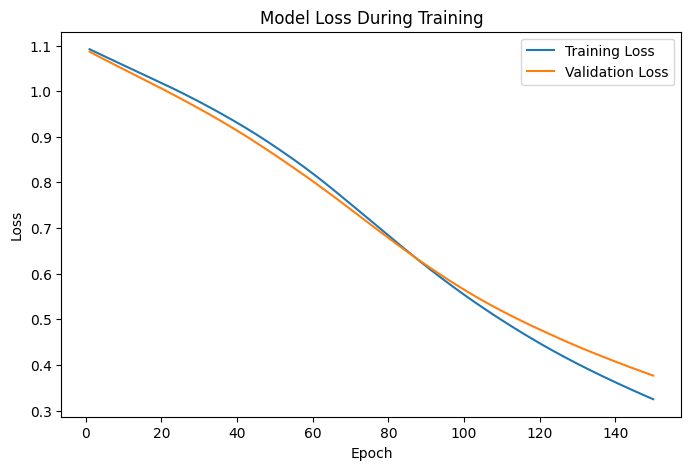

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


def load_preprocessed_data():
    # 1. Load the Wine dataset
    wine = load_wine()
    # 2. Split the dataset into training and testing sets
    X, y = wine.data, wine.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
    # 3. Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 4. Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long)
    
    # 5. Return the processed x and y tensors for training and testing 
    return X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor
# Load preprocessed data
X_train, X_test, y_train, y_test = load_preprocessed_data()

# Define the model
model = nn.Sequential(
    nn.Linear(13, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 3)
)

# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 150
history = {'loss': [], 'val_loss': []}
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train) 
    loss.backward()
    optimizer.step()
    history['loss'].append(loss.item())
    
    model.eval()
    with torch.no_grad():
        outputs_val = model(X_test)
        val_loss = criterion(outputs_val, y_test)  
        history['val_loss'].append(val_loss.item())

# Evaluate on test data
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    test_loss = criterion(outputs, y_test).item()
    _, predicted = torch.max(outputs, 1)
    test_accuracy = accuracy_score(y_test, predicted)

print(f'Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}')

# Plotting actual training and validation loss
epochs = range(1, num_epochs + 1)
train_loss = history['loss']
val_loss = history['val_loss']

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Test Accuracy: 0.9815, Test Loss: 0.1479


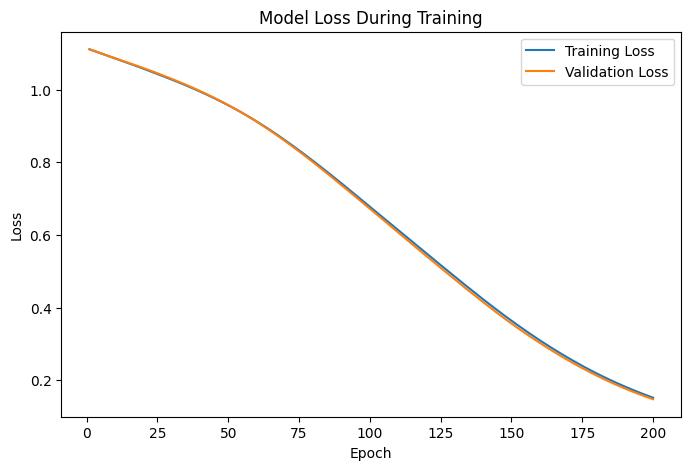

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load preprocessed data
X_train, X_test, y_train, y_test = load_preprocessed_data()

# Define the model
model = nn.Sequential(
    nn.Linear(13, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 3)
)

# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 200
history = {'loss': [], 'val_loss': []}
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train) 
    loss.backward()
    optimizer.step()
    history['loss'].append(loss.item())
    
    model.eval()
    with torch.no_grad():
        outputs_val = model(X_test)
        val_loss = criterion(outputs_val, y_test)  
        history['val_loss'].append(val_loss.item())

# Evaluate on test data
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    test_loss = criterion(outputs, y_test).item()
    _, predicted = torch.max(outputs, 1)
    test_accuracy = accuracy_score(y_test, predicted)

print(f'Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}')

# Plotting actual training and validation loss
epochs = range(1, num_epochs + 1)
train_loss = history['loss']
val_loss = history['val_loss']

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load preprocessed data
X_train, X_test, y_train, y_test = load_preprocessed_data()

# Define the model
model = nn.Sequential(
    nn.Linear(13, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 3)
)

# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 150
history = {'loss': [], 'val_loss': []}
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    history['loss'].append(loss.item())
    
    model.eval()
    with torch.no_grad():
        outputs_val = model(X_test)
        val_loss = criterion(outputs_val, y_test)
        history['val_loss'].append(val_loss.item())

# Evaluate on test data
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    test_loss = criterion(outputs, y_test).item()
    _, predicted = torch.max(outputs, 1)
    test_accuracy = accuracy_score(y_test, predicted)

print(f'Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}')

Test Accuracy: 0.9630, Test Loss: 0.3769


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = load_preprocessed_data()

# Model building
model = nn.Sequential(
    nn.Linear(13, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 3)
)

# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 150
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)  
    loss.backward()
    optimizer.step()

# Save the entire model
torch.save(model, 'wine_model.pth')

# Load the entire model
loaded_model = torch.load('wine_model.pth')
loaded_model.eval()

# Verify the loaded model by evaluating it on test data
with torch.no_grad():
    # Make predictions for both models
    model.eval()
    original_outputs = model(X_test)
    loaded_outputs = loaded_model(X_test)
    # Format predictions
    _, original_predicted = torch.max(original_outputs, 1)
    _, loaded_predicted = torch.max(loaded_outputs, 1)
    # Calculate accuracies
    original_accuracy = accuracy_score(y_test, original_predicted)
    loaded_accuracy = accuracy_score(y_test, loaded_predicted)

# Display accuracies for both models
print(f'Original Model Accuracy: {original_accuracy:.4f}')
print(f'Loaded Model Accuracy: {loaded_accuracy:.4f}')

Original Model Accuracy: 0.8889
Loaded Model Accuracy: 0.8889


In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = load_preprocessed_data()

# Model building
model = nn.Sequential(
    nn.Linear(13, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 3)
)

# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 150
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

# Save the entire model
torch.save(model, 'wine_model.pth')

# Load the model
loaded_model = torch.load('wine_model.pth')
loaded_model.eval()

# Verify the loaded model by evaluating it on test data
with torch.no_grad():
    outputs = loaded_model(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(y_test, predicted)

print(f'Loaded Model Accuracy: {accuracy:.4f}')

Loaded Model Accuracy: 0.9630


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = load_preprocessed_data()

# Model building
model = nn.Sequential(
    nn.Linear(13, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 3)
)

# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 150
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

# TODO: Save the entire model to a file
torch.save(model,'wine_dataset.pth')

# TODO: Load the model from the file
# - Make sure to set the loaded model to evaluation mode using 'eval()'
loaded_model = torch.load('wine_dataset.pth')
loaded_model.eval()

# Verify the loaded model by evaluating it on test data
with torch.no_grad():
    outputs = loaded_model(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(y_test, predicted)

print(f'Loaded Model Accuracy: {accuracy:.4f}')

Loaded Model Accuracy: 0.8704


In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# Load dataset
wine = load_wine()
X = torch.tensor(wine.data, dtype=torch.float32)
y = torch.tensor(wine.target, dtype=torch.long)

# Split dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

# Define the model using nn.Sequential
model = nn.Sequential(
    nn.Linear(13, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 3)
)

# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Initializing checkpointing parameters
best_loss = float('inf')
checkpoint_path = "best_model.pth"

# Model training with checkpointing and validation
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    # Validate the model
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_valid)
        val_loss = criterion(val_outputs, y_valid).item()
    
    # TODO: Check if the validation loss has decreased to save the model
    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(model, checkpoint_path)
        print(f"Model saved at epoch {epoch} with validation loss {val_loss:.4f}!")

Model saved at epoch 0 with validation loss 4.0066!
Model saved at epoch 1 with validation loss 3.4969!
Model saved at epoch 2 with validation loss 3.0060!
Model saved at epoch 3 with validation loss 2.5349!
Model saved at epoch 4 with validation loss 2.0912!
Model saved at epoch 5 with validation loss 1.6849!
Model saved at epoch 6 with validation loss 1.3412!
Model saved at epoch 7 with validation loss 1.0812!
Model saved at epoch 8 with validation loss 0.9374!
Model saved at epoch 19 with validation loss 0.9205!
Model saved at epoch 20 with validation loss 0.9073!
Model saved at epoch 35 with validation loss 0.8994!
Model saved at epoch 36 with validation loss 0.8778!
Model saved at epoch 37 with validation loss 0.8579!
Model saved at epoch 38 with validation loss 0.8434!
Model saved at epoch 39 with validation loss 0.8354!
Model saved at epoch 40 with validation loss 0.8335!
Model saved at epoch 43 with validation loss 0.8319!
Model saved at epoch 44 with validation loss 0.8269!
Mo

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# Load dataset
wine = load_wine()
X = torch.tensor(wine.data, dtype=torch.float32)
y = torch.tensor(wine.target, dtype=torch.long)

# Split dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

# Define the model using nn.Sequential
model = nn.Sequential(
    nn.Linear(13, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 3)
)

# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Initializing checkpointing parameters
best_loss = float('inf')
checkpoint_path = "best_model.pth"

# Model training with checkpointing based on validation loss
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    # Validate the model
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_valid)
        val_loss = criterion(val_outputs, y_valid).item()
    
    # TODO: Save the model if the training loss has decreased
    if val_loss < best_loss:
        best_loss = loss
        torch.save(model, checkpoint_path)
        print(f"Model saved at epoch {epoch} with training loss {loss:.4f}!")

Model saved at epoch 0 with training loss 10.5387!
Model saved at epoch 1 with training loss 10.1650!
Model saved at epoch 2 with training loss 9.8064!
Model saved at epoch 3 with training loss 9.4629!
Model saved at epoch 4 with training loss 9.1318!
Model saved at epoch 5 with training loss 8.8107!
Model saved at epoch 6 with training loss 8.4972!
Model saved at epoch 7 with training loss 8.1908!
Model saved at epoch 8 with training loss 7.8910!
Model saved at epoch 9 with training loss 7.5978!
Model saved at epoch 10 with training loss 7.3168!
Model saved at epoch 11 with training loss 7.0506!
Model saved at epoch 12 with training loss 6.7930!
Model saved at epoch 13 with training loss 6.5433!
Model saved at epoch 14 with training loss 6.3009!
Model saved at epoch 15 with training loss 6.0663!
Model saved at epoch 16 with training loss 5.8362!
Model saved at epoch 17 with training loss 5.6079!
Model saved at epoch 18 with training loss 5.3811!
Model saved at epoch 19 with training l

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# Load dataset
wine = load_wine()
X = torch.tensor(wine.data, dtype=torch.float32)
y = torch.tensor(wine.target, dtype=torch.long)

# Split dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

# Define the model using nn.Sequential
model = nn.Sequential(
    nn.Linear(13, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 3)
)

# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# TODO: Initialize checkpointing parameters
# - best_loss
# - checkpoint_path
best_loss = float('inf')
checkpoint_path = "best_model.pth"

# Model training with checkpointing and validation
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    # Validate the model
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_valid)
        val_loss = criterion(val_outputs, y_valid).item()
    
    # Save the model if the validation loss has decreased
    if val_loss < best_loss:
        best_loss = val_loss
        # TODO: Save the model 
        torch.save(model, checkpoint_path)
        print(f"Model saved at epoch {epoch} with validation loss {val_loss:.4f}!")

Model saved at epoch 0 with validation loss 25.9005!
Model saved at epoch 1 with validation loss 24.9967!
Model saved at epoch 2 with validation loss 24.1062!
Model saved at epoch 3 with validation loss 23.2303!
Model saved at epoch 4 with validation loss 22.3696!
Model saved at epoch 5 with validation loss 21.5240!
Model saved at epoch 6 with validation loss 20.6945!
Model saved at epoch 7 with validation loss 19.8817!
Model saved at epoch 8 with validation loss 19.0841!
Model saved at epoch 9 with validation loss 18.3014!
Model saved at epoch 10 with validation loss 17.5352!
Model saved at epoch 11 with validation loss 16.7869!
Model saved at epoch 12 with validation loss 16.0559!
Model saved at epoch 13 with validation loss 15.3382!
Model saved at epoch 14 with validation loss 14.6328!
Model saved at epoch 15 with validation loss 13.9455!
Model saved at epoch 16 with validation loss 13.2858!
Model saved at epoch 17 with validation loss 12.6445!
Model saved at epoch 18 with validatio

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_wine

# Load dataset
wine = load_wine()
X = torch.tensor(wine.data, dtype=torch.float32)
y = torch.tensor(wine.target, dtype=torch.long)  

# Create DataLoader for mini-batches
batch_size = 16
dataset = TensorDataset(X, y)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define the model 
model = nn.Sequential(
    nn.Linear(13, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 3)
)

# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Model training with mini-batches
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in data_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * batch_X.size(0)
        print(f'Batch Loss: {loss.item():.4f}')
    
    epoch_loss = running_loss / len(data_loader.dataset)
    print(f'Epoch [{epoch+1}/{num_epochs}] Average Loss: {epoch_loss:.4f}')

Batch Loss: 7.1696
Batch Loss: 8.9586
Batch Loss: 8.5466
Batch Loss: 3.7992
Batch Loss: 7.0044
Batch Loss: 9.3708
Batch Loss: 7.5171
Batch Loss: 4.1729
Batch Loss: 5.2506
Batch Loss: 4.1958
Batch Loss: 3.8550
Batch Loss: 5.4869
Epoch [1/10] Average Loss: 6.3394
Batch Loss: 3.7744
Batch Loss: 2.3175
Batch Loss: 2.9215
Batch Loss: 2.5188
Batch Loss: 2.2131
Batch Loss: 1.4325
Batch Loss: 1.5436
Batch Loss: 1.2421
Batch Loss: 1.4418
Batch Loss: 0.9665
Batch Loss: 1.4679
Batch Loss: 2.3579
Epoch [2/10] Average Loss: 1.9896
Batch Loss: 1.1499
Batch Loss: 2.1077
Batch Loss: 1.0566
Batch Loss: 1.3353
Batch Loss: 1.3202
Batch Loss: 1.6262
Batch Loss: 1.7686
Batch Loss: 0.9177
Batch Loss: 1.6805
Batch Loss: 1.4918
Batch Loss: 1.2440
Batch Loss: 1.8262
Epoch [3/10] Average Loss: 1.4316
Batch Loss: 1.4102
Batch Loss: 0.9401
Batch Loss: 1.0059
Batch Loss: 1.0090
Batch Loss: 0.7937
Batch Loss: 0.8099
Batch Loss: 0.9131
Batch Loss: 1.0131
Batch Loss: 1.0899
Batch Loss: 0.8194
Batch Loss: 1.2144
Batch

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# Load dataset
wine = load_wine()
X = torch.tensor(wine.data, dtype=torch.float32)
y = torch.tensor(wine.target, dtype=torch.long)

# Split dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = nn.Sequential(
    nn.Linear(13, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 3)
)

# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

# TODO: Complete the learning rate scheduler                            
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10)

# Model training with learning rate scheduling
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_valid)
        val_loss = criterion(val_outputs, y_valid)
    
    # Update learning rate based on validation loss
    scheduler.step(val_loss)  

    if (epoch + 1) % 10 == 0:
        lr = optimizer.param_groups[0]["lr"]
        print(f'Epoch [{epoch + 1}/{num_epochs}], LR: {lr:.6f}')

Epoch [10/100], LR: 0.100000
Epoch [20/100], LR: 0.100000
Epoch [30/100], LR: 0.100000
Epoch [40/100], LR: 0.010000
Epoch [50/100], LR: 0.001000
Epoch [60/100], LR: 0.000100
Epoch [70/100], LR: 0.000010
Epoch [80/100], LR: 0.000001
Epoch [90/100], LR: 0.000000
Epoch [100/100], LR: 0.000000


In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# Load dataset
wine = load_wine()
X = torch.tensor(wine.data, dtype=torch.float32)
y = torch.tensor(wine.target, dtype=torch.long)

# Split dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = nn.Sequential(
    nn.Linear(13, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 3)
)

# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

# Learning rate scheduler
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10)

# Model training with learning rate scheduling
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_valid)
        val_loss = criterion(val_outputs, y_valid)
    
    # TODO: Use the scheduler to update the learning rate based on the validation loss
    scheduler.step(val_loss)

    if (epoch + 1) % 10 == 0:
        lr = optimizer.param_groups[0]["lr"]
        print(f'Epoch [{epoch + 1}/{num_epochs}], LR: {lr:.6f}')

Epoch [10/100], LR: 0.100000
Epoch [20/100], LR: 0.010000
Epoch [30/100], LR: 0.001000
Epoch [40/100], LR: 0.001000
Epoch [50/100], LR: 0.000100
Epoch [60/100], LR: 0.000010
Epoch [70/100], LR: 0.000001
Epoch [80/100], LR: 0.000000
Epoch [90/100], LR: 0.000000
Epoch [100/100], LR: 0.000000


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_wine

# Load and select the data
wine = load_wine()
X = wine.data
y = wine.target

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# Define the model with dropout
model = nn.Sequential(
    nn.Linear(13, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 3)
)

# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  

for i in range(100):
    model.train()
    optimizer.zero_grad()  # Zero the gradient buffers
    outputs = model(X)  # Forward pass
    loss = criterion(outputs, y)  # Compute loss
    loss.backward()  # Backward pass

    if(i==50):
        # Introducing Weight Decay from 50th epoch on with 0.01 value
        optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.005)
        print("\nRegularization added to optimizer\n")

    if (i+1) % 10 ==0:    
        # L2 norm of weights of the first linear layer 
        first_layer_weights = model[0].weight.norm(2).item()
        print(f'{i+1} - L2 norm of weights: {first_layer_weights}')

    optimizer.step()  # Update weights

10 - L2 norm of weights: 1.9888722896575928
20 - L2 norm of weights: 1.9899319410324097
30 - L2 norm of weights: 1.9950298070907593
40 - L2 norm of weights: 2.0034146308898926
50 - L2 norm of weights: 2.0142910480499268

Regularization added to optimizer

60 - L2 norm of weights: 1.9876816272735596
70 - L2 norm of weights: 1.967660665512085
80 - L2 norm of weights: 1.9548331499099731
90 - L2 norm of weights: 1.9482876062393188
100 - L2 norm of weights: 1.9416017532348633


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.25, 0.25, 0.25])

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

data_dir = 'data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=0)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(class_names)


def imshow(inp, title):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.title(title)
    plt.show()


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


#### Finetuning the convnet ####
# Load a pretrained model and reset final fully connected layer.

model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model.fc = nn.Linear(num_ftrs, 2)

model = model.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.001)

# StepLR Decays the learning rate of each parameter group by gamma every step_size epochs
# Decay LR by a factor of 0.1 every 7 epochs
# Learning rate scheduling should be applied after optimizer’s update
# e.g., you should write your code this way:
# for epoch in range(100):
#     train(...)
#     validate(...)
#     scheduler.step()

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs=25)


#### ConvNet as fixed feature extractor ####
# Here, we need to freeze all the network except the final layer.
# We need to set requires_grad == False to freeze the parameters so that the gradients are not computed in backward()
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_digits

# Load and select the data
digits = load_digits()
X = digits.data
y = digits.target

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# Define the model with dropout
model = nn.Sequential(
    nn.Linear(64, 50),
    nn.ReLU(),
    # TODO: Add a Dropout layer with 30%
    nn.Dropout(0.3),
    nn.Linear(50, 20),
    nn.ReLU(),
    # TODO: Add a Dropout layer with 20%
    nn.Dropout(0.2),
    nn.Linear(20, 10)
)

# Print the model summary
print(model)

# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  

for i in range(100):
    model.train()
    optimizer.zero_grad()  # Zero the gradient buffers
    outputs = model(X)  # Forward pass
    loss = criterion(outputs, y)  # Compute loss
    loss.backward()  # Backward pass

    if(i==50):
        # TODO: Add weight decay to optimizer from 50th epoch on, set weight_decay to 0.02
        optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.02)
        print("\nRegularization added to optimizer\n")

    if (i+1) % 10 ==0:    
        # L2 norm of weights of the first linear layer 
        first_layer_weights = model[0].weight.norm(2).item()
        print(f'{i+1} - L2 norm of weights: {first_layer_weights}')

    optimizer.step()  # Update weights

Sequential(
  (0): Linear(in_features=64, out_features=50, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.3, inplace=False)
  (3): Linear(in_features=50, out_features=20, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2, inplace=False)
  (6): Linear(in_features=20, out_features=10, bias=True)
)
10 - L2 norm of weights: 4.098433971405029
20 - L2 norm of weights: 4.121596336364746
30 - L2 norm of weights: 4.159133434295654
40 - L2 norm of weights: 4.214475154876709
50 - L2 norm of weights: 4.286011219024658

Regularization added to optimizer

60 - L2 norm of weights: 4.141427516937256
70 - L2 norm of weights: 4.000541687011719
80 - L2 norm of weights: 3.8836722373962402
90 - L2 norm of weights: 3.782262086868286
100 - L2 norm of weights: 3.696597099304199


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_wine

# Load and select the data
wine = load_wine()
X = wine.data
y = wine.target

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# TODO: Define the model with dropout
model = nn.Sequential(
    nn.Linear(13,10),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(10,10),
    nn.ReLU(),
    nn.Dropout(0.05),
    nn.Linear(10,3)
)


# TODO: Print the model summary
print(model)

# TODO: Define criterion and optimizer with weight decay
# - Use nn.CrossEntropyLoss() for criterion
# - Use optim.Adam with lr=0.001 and weight_decay=0.01 for optimizer

# TODO: Write the training loop and print the loss every 10 epochs
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001,weight_decay=0.01)

for epoch in range(150):
    model.train()
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs,y)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

Sequential(
  (0): Linear(in_features=13, out_features=10, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.1, inplace=False)
  (3): Linear(in_features=10, out_features=10, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.05, inplace=False)
  (6): Linear(in_features=10, out_features=3, bias=True)
)
Epoch 10, Loss: 19.621379852294922
Epoch 20, Loss: 14.043731689453125
Epoch 30, Loss: 7.607357978820801
Epoch 40, Loss: 3.2067010402679443
Epoch 50, Loss: 3.3325204849243164
Epoch 60, Loss: 3.4236223697662354
Epoch 70, Loss: 2.2100112438201904
Epoch 80, Loss: 2.6268749237060547
Epoch 90, Loss: 2.5047507286071777
Epoch 100, Loss: 2.0730199813842773
Epoch 110, Loss: 2.3454220294952393
Epoch 120, Loss: 2.2438137531280518
Epoch 130, Loss: 1.8367576599121094
Epoch 140, Loss: 1.8811742067337036
Epoch 150, Loss: 1.7423274517059326
